In [2]:
import numpy as np 
import os 
import pandas as pd

table = pd.read_excel("/Users/manonmantez/Desktop/place_fileds_manon_cues_dec_24.csv", engine='openpyxl', sheet_name='all')
print(table)

def transform_value(x):
    if pd.notna(x):
        transformed_value = x * 1.92 + 18.5
        if transformed_value > 192:
            return transformed_value - 192
        else:
            return transformed_value
    else:
        return x
    
table = table.applymap(transform_value)   
table = table.round(0)
print(table)

# Compter combien de fois la valeur de 192 est dépassée
count_exceed_192 = (table > 192).sum().sum()
print("Nombre de fois que la valeur de 192 est dépassée :", count_exceed_192)

# Obtenir les indices des lignes et des colonnes où la valeur de 192 est dépassée
indices_exceed_192 = np.argwhere(table.values > 192)
print("Indices des lignes et des colonnes où la valeur de 192 est dépassée :")
for index in indices_exceed_192:
    print(f"Ligne : {index[0]}, Colonne : {index[1]}")

       P20   P21  P22   P23   P24   P25   P26   P27
0     29.0  55.0   42  56.0  72.0  22.0  70.0  91.0
1     27.0  73.0   45  53.0  41.0  75.0  81.0  28.0
2     57.0  73.0   91  71.0  70.0  18.0  80.0  84.0
3     75.0  74.0   47  75.0  32.0  76.0  64.0  90.0
4     22.0  22.0   47  70.0  18.0  65.0  48.0  90.0
...    ...   ...  ...   ...   ...   ...   ...   ...
1756   NaN   NaN   22   NaN   NaN   NaN   NaN   NaN
1757   NaN   NaN   23   NaN   NaN   NaN   NaN   NaN
1758   NaN   NaN   23   NaN   NaN   NaN   NaN   NaN
1759   NaN   NaN   25   NaN   NaN   NaN   NaN   NaN
1760   NaN   NaN   72   NaN   NaN   NaN   NaN   NaN

[1761 rows x 8 columns]
        P20    P21    P22    P23    P24    P25    P26    P27
0      74.0  124.0   99.0  126.0  157.0   61.0  153.0    1.0
1      70.0  159.0  105.0  120.0   97.0  162.0  174.0   72.0
2     128.0  159.0    1.0  155.0  153.0   53.0  172.0  180.0
3     162.0  161.0  109.0  162.0   80.0  164.0  141.0  191.0
4      61.0   61.0  109.0  153.0   53.0  143.0

/var/folders/95/8rmbkst12z960tdjyz8xj_h40000gn/T/ipykernel_48476/2455684831.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table = table.applymap(transform_value)


In [3]:
relative_freq = table.apply(lambda x: x.value_counts(normalize=True))
relative_freq = relative_freq.fillna(0)
relative_freq

,P20,P21,P22,P23,P24,P25,P26,P27
1.0,0.008433,0.012231,0.004543,0.002045,0.003852,0.010746,0.005837,0.020329
3.0,0.002108,0.009319,0.003407,0.003408,0.012327,0.011343,0.015564,0.031946
5.0,0.011244,0.010483,0.003975,0.012270,0.000770,0.012537,0.058366,0.020329
7.0,0.001405,0.004077,0.004543,0.008862,0.002311,0.012537,0.011673,0.005808
9.0,0.000000,0.003494,0.000000,0.000682,0.000000,0.000597,0.004864,0.004840
...,...,...,...,...,...,...,...,...
184.0,0.004216,0.014560,0.011925,0.005453,0.003852,0.011343,0.001946,0.008712
186.0,0.006325,0.012231,0.008518,0.005453,0.010786,0.025672,0.000973,0.032914
187.0,0.004919,0.013978,0.005111,0.006135,0.006163,0.004776,0.008755,0.010649
189.0,0.001405,0.017472,0.006246,0.008862,0.006934,0.004179,0.000973,0.014521


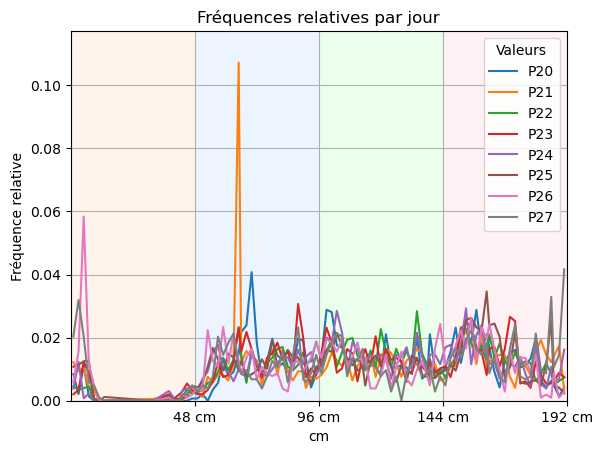

In [4]:
import matplotlib.pyplot as plt

colors = ['#FFDDC1', '#C1E1FF', '#C1FFC1', '#FFD1DC']
intervals = [0, 48, 96, 144, 192]
for i in range(len(intervals) - 1):
    plt.axvspan(intervals[i], intervals[i+1], facecolor=colors[i % len(colors)], alpha=0.3)

# Tracer les courbes
for column in relative_freq.columns:
    plt.plot(relative_freq.index, relative_freq[column], label=column)

plt.xlabel('cm')
plt.xlim(0, 192)
plt.ylim(0, max(relative_freq.max()) + 0.01)
plt.ylabel('Fréquence relative')
plt.title('Fréquences relatives par jour')
plt.legend(title='Valeurs')
plt.xticks(ticks=[48, 96, 144, 192], labels=['48 cm', '96 cm', '144 cm', '192 cm'])
plt.grid(True)
plt.show()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (5).

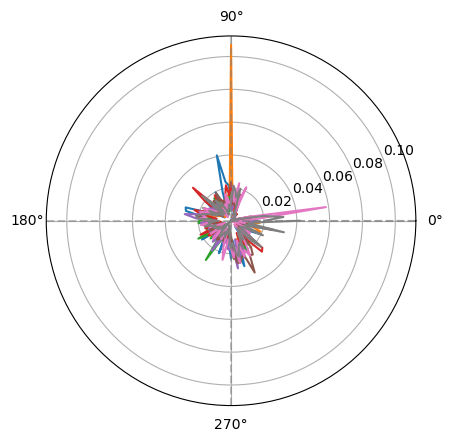

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Convert linear data to polar coordinates
theta = np.linspace(0, 2 * np.pi, len(relative_freq.index))

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the data
for column in relative_freq.columns:
    ax.plot(theta, relative_freq[column], label=column)

# Add lines for each interval
intervals = [0, 48, 96, 144, 192]
for interval in intervals:
    ax.axvline(x=interval * 2 * np.pi / 192, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax.set_xticklabels(['0 cm', '48 cm', '96 cm', '144 cm', '192 cm'])
ax.set_ylim(0, max(relative_freq.max()) + 0.01)
ax.set_title('Polar Representation of Firing Field of Representative Neurons')
ax.legend(title='Valeurs')
plt.show()

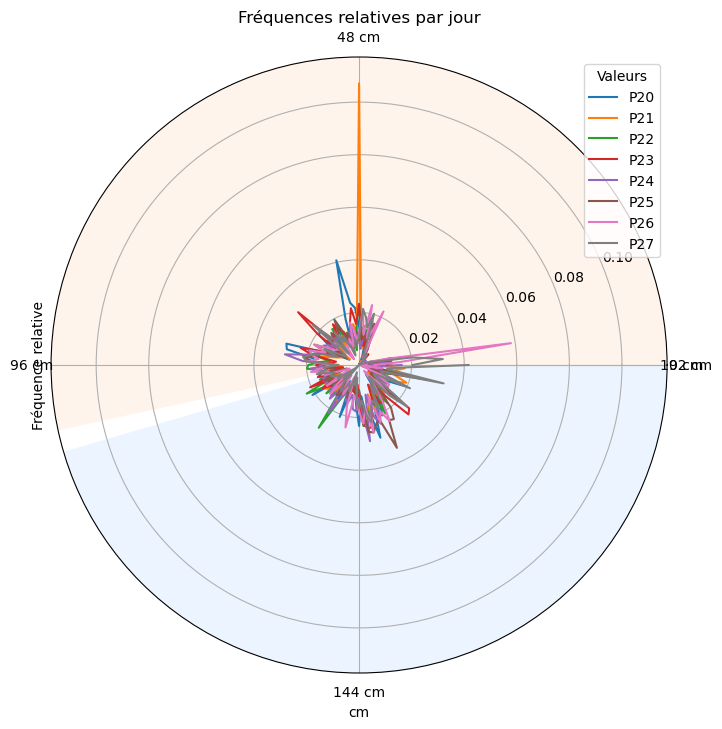

In [6]:
import matplotlib.pyplot as plt
import numpy as np
colors = ['#FFDDC1', '#C1E1FF', '#C1FFC1', '#FFD1DC']
intervals = [0, 48, 96, 144, 192]

# Convertir les indices en radians
theta = np.linspace(0, 2 * np.pi, len(relative_freq.index))

# Créer la figure et l'axe polaire
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Colorer les intervalles
for i in range(len(intervals) - 1):
    ax.fill_between(theta[intervals[i]:intervals[i+1]], 0, 1, facecolor=colors[i % len(colors)], alpha=0.3)

# Tracer les courbes
for column in relative_freq.columns:
    ax.plot(theta, relative_freq[column], label=column)

ax.set_xlabel('cm')
ax.set_ylim(0, max(relative_freq.max()) + 0.01)
ax.set_ylabel('Fréquence relative')
ax.set_title('Fréquences relatives par jour')
ax.legend(title='Valeurs')
ax.set_xticks(np.linspace(0, 2 * np.pi, len(intervals)))
ax.set_xticklabels(['0 cm', '48 cm', '96 cm', '144 cm', '192 cm'])
ax.grid(True)

plt.show()

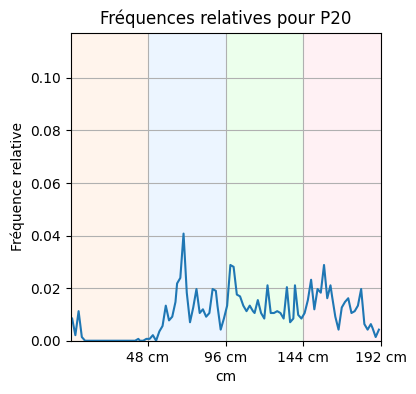

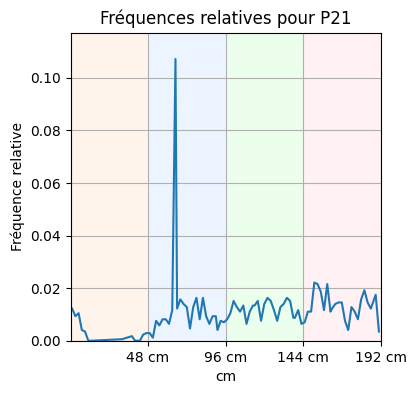

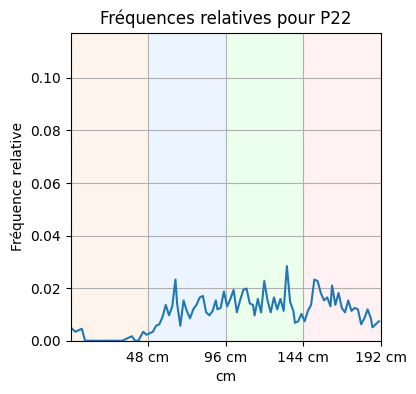

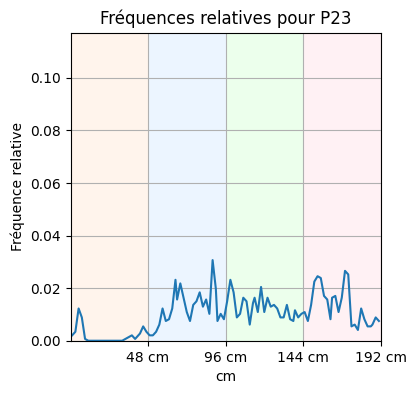

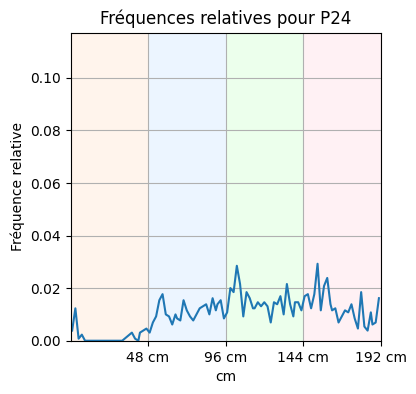

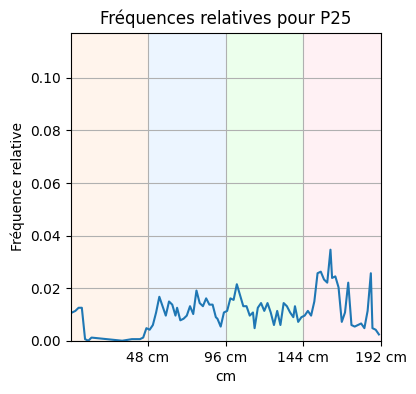

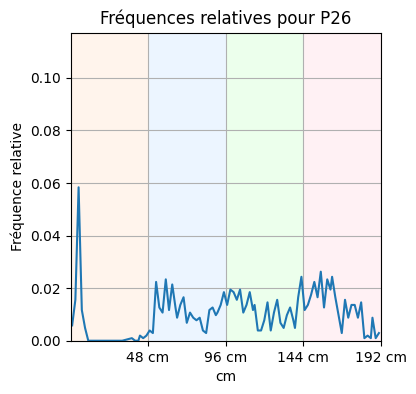

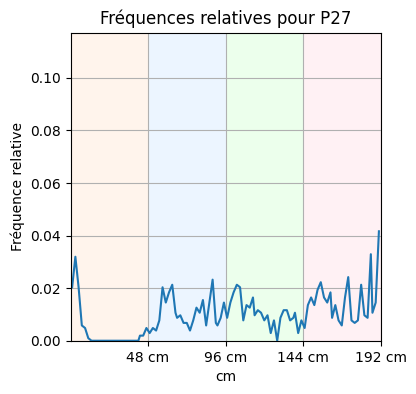

In [32]:

colors = ['#FFDDC1', '#C1E1FF', '#C1FFC1', '#FFD1DC']
intervals = [0, 48, 96, 144, 192]

for column in relative_freq.columns:
    plt.figure(figsize=(4, 4))
    
    # Colorer les intervalles
    for i in range(len(intervals) - 1):
        plt.axvspan(intervals[i], intervals[i+1], facecolor=colors[i % len(colors)], alpha=0.3)
    
    # Tracer la courbe pour le jour actuel
    plt.plot(relative_freq.index, relative_freq[column], label=column)
    
    plt.xlabel('cm')
    plt.xlim(0, 192)
    plt.ylim(0, max(relative_freq.max()) + 0.01)
    plt.ylabel('Fréquence relative')
    plt.title(f'Fréquences relatives pour {column}')
    #plt.legend(title='Valeurs')
    plt.xticks(ticks=[48, 96, 144, 192], labels=['48 cm', '96 cm', '144 cm', '192 cm'])
    plt.grid(True)
    plt.show()

In [92]:
table = pd.read_excel("/Users/manonmantez/Desktop/place_fileds_manon_cues_dec_24.csv", engine='openpyxl')
bins = np.arange(0, 110, 10)
labels = [f'{i}-{i+10}' for i in range(0, 100, 10)]

# Diviser les positions en intervalles de 10 cm
table_binned = table.apply(lambda x: pd.cut(x, bins=bins, labels=labels, right=False))
print(table_binned)

# Calculer la fréquence relative pour chaque intervalle
relative_freq = table_binned.apply(lambda x: x.value_counts(normalize=True).sort_index())

print("Fréquence relative par intervalles de 10 cm:")
print(relative_freq)

        P20    P21     P22    P23    P24    P25    P26     P27
0     20-30  50-60   40-50  50-60  70-80  20-30  70-80  90-100
1     20-30  70-80   40-50  50-60  40-50  70-80  80-90   20-30
2     50-60  70-80  90-100  70-80  70-80  10-20  80-90   80-90
3     70-80  70-80   40-50  70-80  30-40  70-80  60-70  90-100
4     20-30  20-30   40-50  70-80  10-20  60-70  40-50  90-100
...     ...    ...     ...    ...    ...    ...    ...     ...
1756    NaN    NaN   20-30    NaN    NaN    NaN    NaN     NaN
1757    NaN    NaN   20-30    NaN    NaN    NaN    NaN     NaN
1758    NaN    NaN   20-30    NaN    NaN    NaN    NaN     NaN
1759    NaN    NaN   20-30    NaN    NaN    NaN    NaN     NaN
1760    NaN    NaN   70-80    NaN    NaN    NaN    NaN     NaN

[1761 rows x 8 columns]
Fréquence relative par intervalles de 10 cm:
             P20       P21       P22       P23       P24       P25       P26  \
0-10    0.000000  0.000582  0.000000  0.000000  0.000000  0.000000  0.000000   
10-20   0.0077

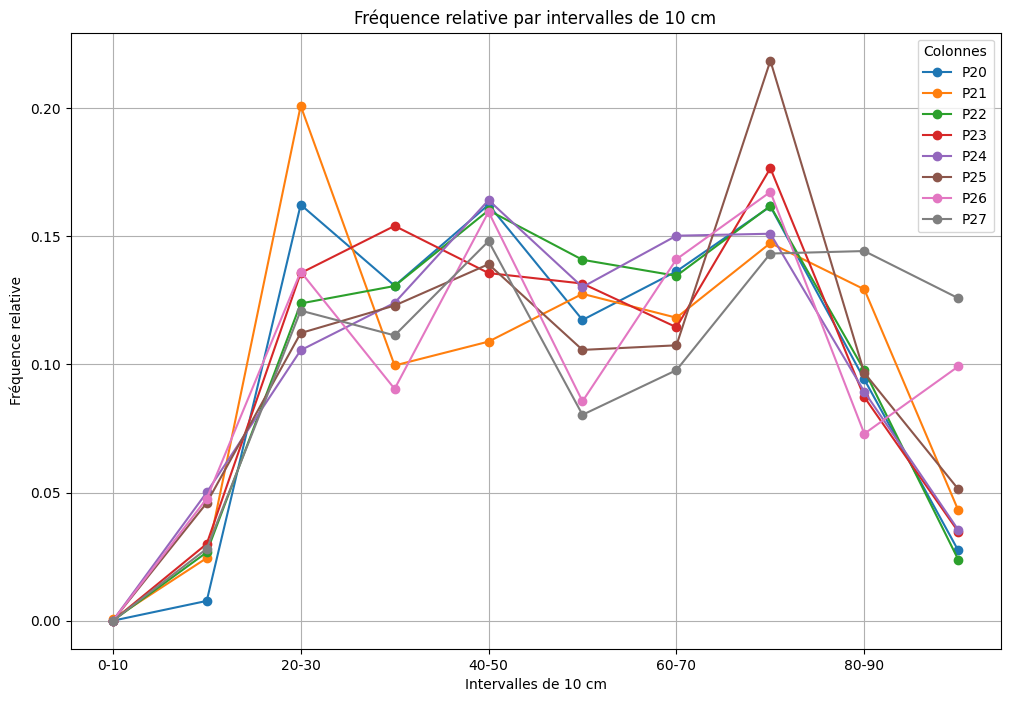

In [95]:
# Tracer les fréquences relatives sous forme de courbes
relative_freq.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Intervalles de 10 cm')
plt.ylabel('Fréquence relative')
plt.title('Fréquence relative par intervalles de 10 cm')
plt.legend(title='Colonnes')
plt.grid(True)
plt.show()